In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

	
df = pd.read_csv(io.BytesIO(uploaded['2022_HiMCM_Data.csv']))

df.head()

Saving 2022_HiMCM_Data.csv to 2022_HiMCM_Data.csv


,Year,PPM,Degrees C
0,1959.0,315.98,0.03
1,1960.0,316.91,-0.03
2,1961.0,317.64,0.06
3,1962.0,318.45,0.03
4,1963.0,318.99,0.05


In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year']

0    1959-01-01
1    1960-01-01
2    1961-01-01
3    1962-01-01
4    1963-01-01
        ...    
59   2018-01-01
60   2019-01-01
61   2020-01-01
62   2021-01-01
63          NaT
Name: Year, Length: 64, dtype: datetime64[ns]

In [ ]:
df.set_index('Year',inplace=True)

In [ ]:
df = df.drop(['Degrees C'], axis=1)

In [ ]:
df.describe()

,PPM
count,63.000000
mean,357.338571
std,29.848645
min,315.980000
25%,330.660000
50%,354.450000
75%,381.035000
max,416.450000


In [ ]:
df

,PPM
Year,
1959-01-01,315.98
1960-01-01,316.91
1961-01-01,317.64
1962-01-01,318.45
1963-01-01,318.99
...,...
2018-01-01,408.72
2019-01-01,411.66
2020-01-01,414.24


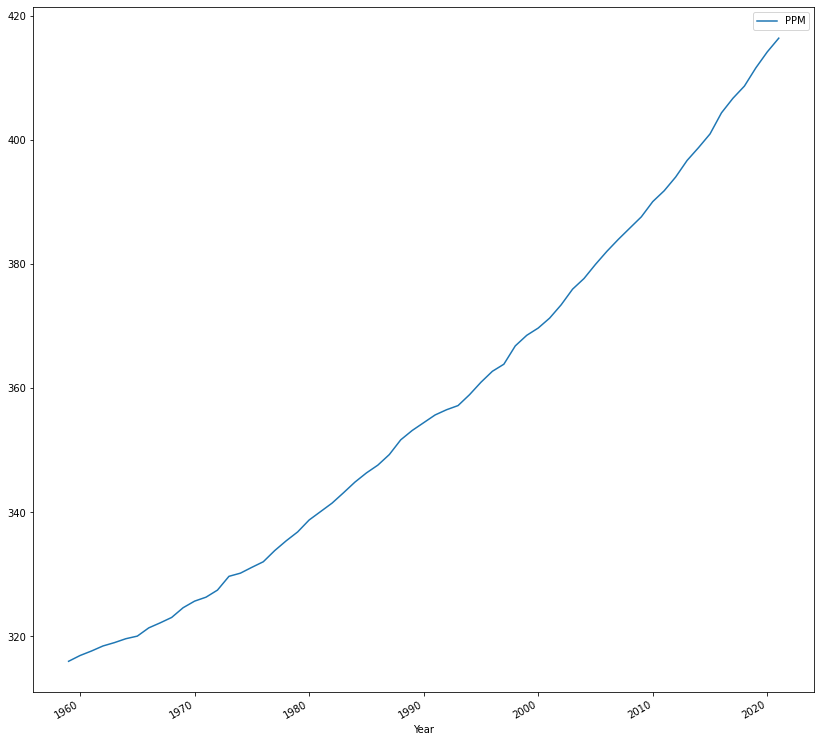

In [ ]:
#Visualising PPM data
df.plot(figsize=(14, 14))

In [ ]:
#Using all of the dataset to train
train_data = df['1959-01-01':'2021-01-01']  
#test_data = df['2007-01-01':'2021-01-01']

**model=sm.tsa.arima.ARIMA(train_data,order=(p,d,q))**


**p** is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model.This this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

**d** is the number of non-seasonal differences needed for stationarity. This would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

**q** is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.


**We do not need to calculate any of this by using complex math, for the function below will do it for us**

In [ ]:
#function finds the p, q and d values

!pip install pmdarima
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 27.5 MB/s 
     |████████████████████████████████| 9.9 MB 67.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=120.840, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=113.374, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=118.907, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=95.438, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=94.265, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=111.563, Time=0.06 

In [ ]:
#train model using ARIMA

import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train_data,order=(2,2,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    PPM   No. Observations:                   63
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -41.212
Date:                Mon, 14 Nov 2022   AIC                             90.424
Time:                        04:40:41   BIC                             98.867
Sample:                    01-01-1959   HQIC                            93.733
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1946      0.160     -1.214      0.225      -0.509       0.120
ar.L2         -0.3643      0.170     -2.138      0.032      -0.698      -0.030
ma.L1         -0.5796      0.171     -3.394      0.001      -0.914      -0.245
sigma2         0.2219      0.041      5.356      0.000       0.141       0.303
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.92
Prob(Q):                              0.68   Prob(JB):                         0.14
Heteroskedasticity (H):               0.74   Skew:                             0.61
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

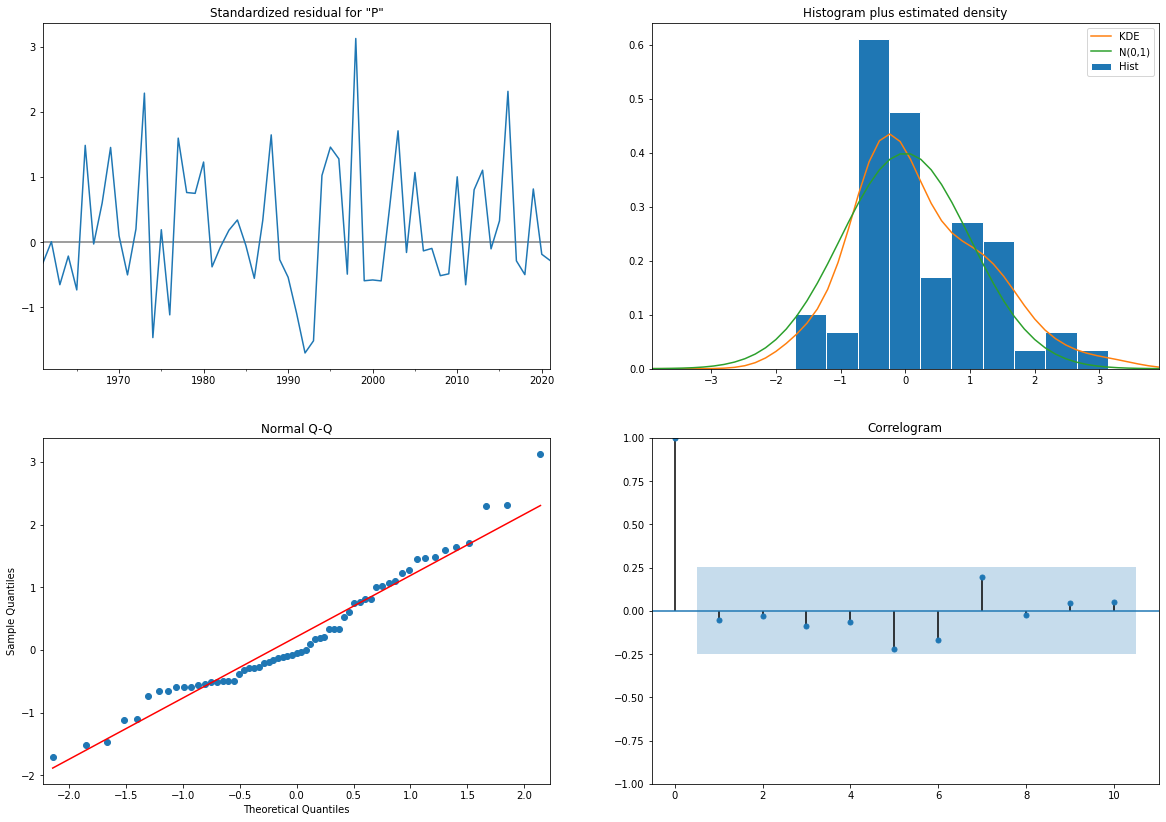

In [ ]:
model_fit.plot_diagnostics(figsize=(20, 14))
plt.show()

In [ ]:
#Giving it the dataset values compare the performance

#Data is not seasonal, so we will use ARIMA

#model Gives looks very good fit compared to the test if 

pred2 = model_fit.predict('1961-01-01','2021-01-01')

print(pred2)

1961-01-01    317.840047
1962-01-01    318.446664
1963-01-01    319.316019
1964-01-01    319.723157
1965-01-01    320.388679
                 ...    
2017-01-01    406.895958
2018-01-01    408.955915
2019-01-01    411.275201
2020-01-01    414.328349
2021-01-01    416.584204
Freq: AS-JAN, Name: predicted_mean, Length: 61, dtype: float64


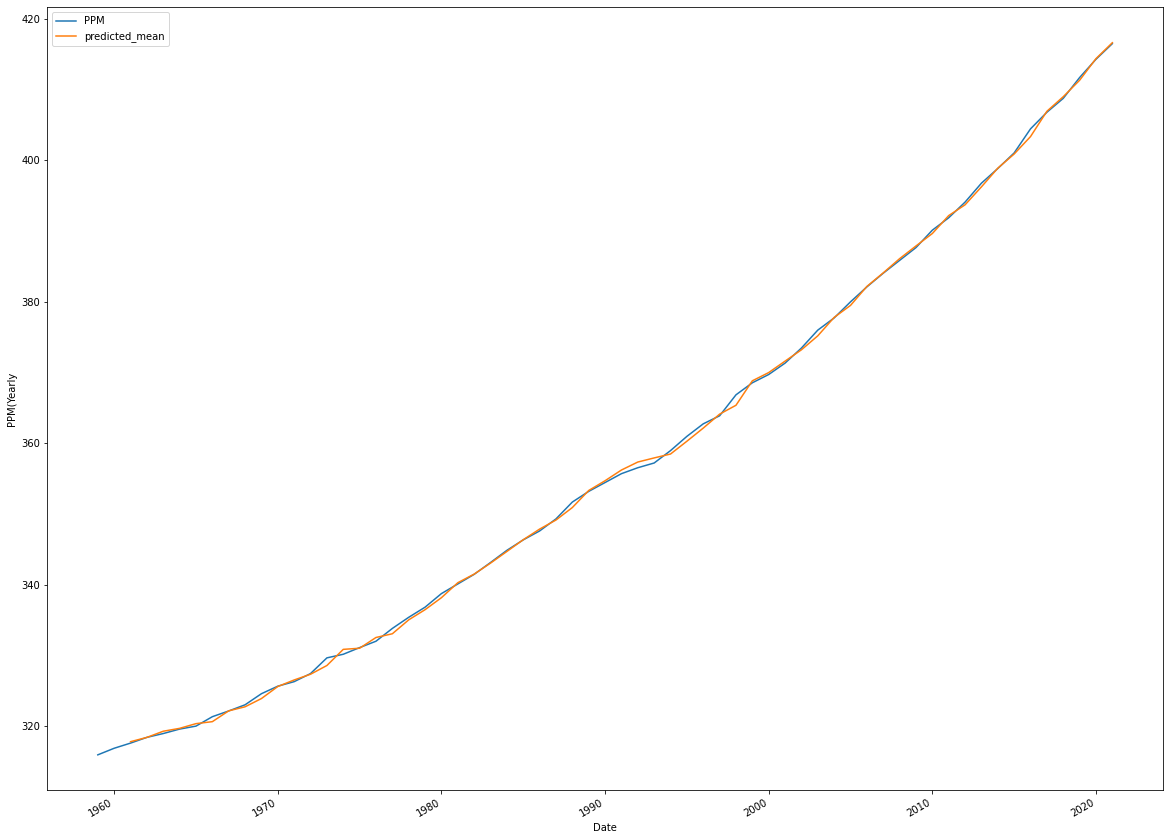

In [ ]:
#Plot the performance

import matplotlib.pyplot as plt

ax = df.plot(figsize=(20, 16))
pred2.plot()
plt.ylabel('PPM(Yearly')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
#model predicts 684 ppm at 2129
#model predicts 612 ppm at 2100
pred3 = model_fit.predict('2021-01-01', '2035-01-01')
print(pred3)

#pred2_ci = pred2.conf_int()
#print(pred2.predicted_mean['2023-01-01':'2025-01-01'])
#print(pred3)

2021-01-01    416.584204
2022-01-01    418.940955
2023-01-01    421.512045
2024-01-01    423.965177
2025-01-01    426.412066
2026-01-01    428.903147
2027-01-01    431.387903
2028-01-01    433.857789
2029-01-01    436.332873
2030-01-01    438.812363
2031-01-01    441.289102
2032-01-01    443.764771
2033-01-01    446.241651
2034-01-01    448.718685
2035-01-01    451.195248
Freq: AS-JAN, Name: predicted_mean, dtype: float64


2021-01-01    416.584204
2022-01-01    418.940955
2023-01-01    421.512045
2024-01-01    423.965177
2025-01-01    426.412066
2026-01-01    428.903147
2027-01-01    431.387903
2028-01-01    433.857789
2029-01-01    436.332873
2030-01-01    438.812363
2031-01-01    441.289102
2032-01-01    443.764771
2033-01-01    446.241651
2034-01-01    448.718685
2035-01-01    451.195248
Freq: AS-JAN, Name: predicted_mean, dtype: float64


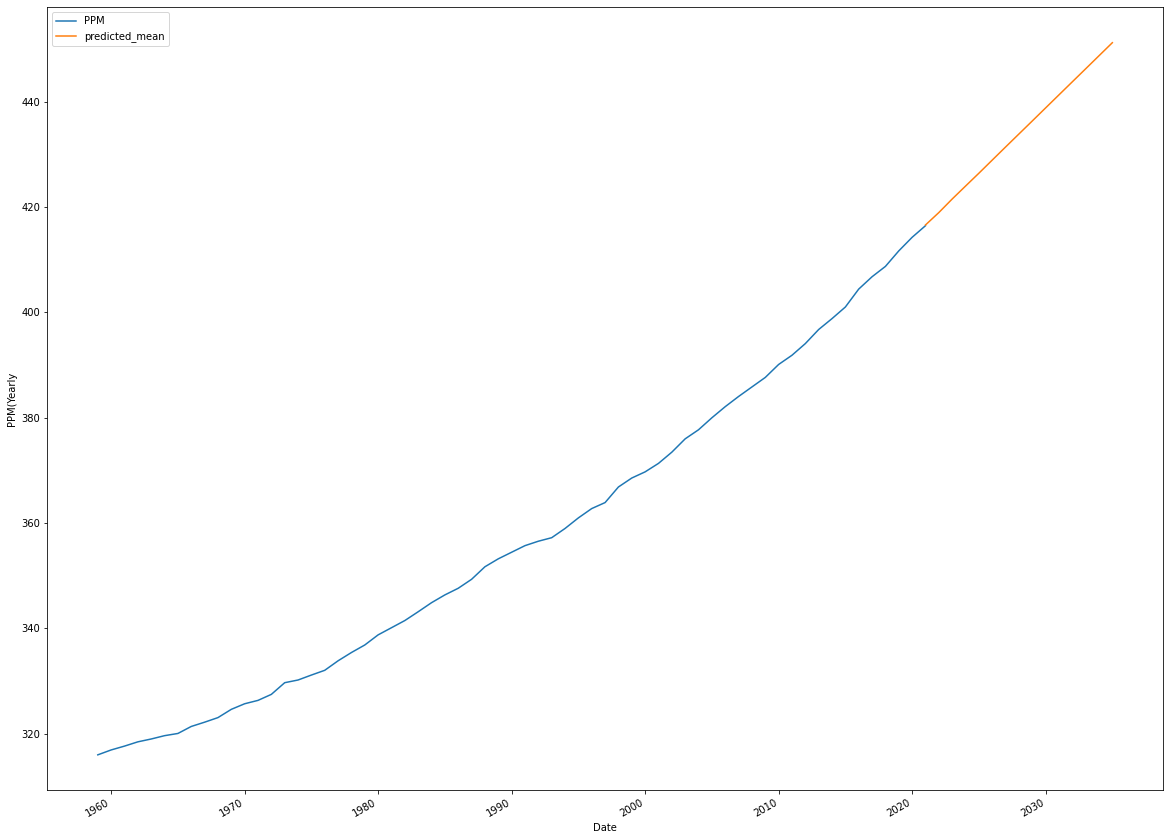

In [ ]:
#predict is pretty linear
import matplotlib.pyplot as plt

print(pred3)

ax = df.plot(figsize=(20, 16))
#pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
#ax.fill_between(pred2.index, pred2.iloc[:, 0], pred2.iloc[:, 1], color='k', alpha=.1)
pred3.plot()
plt.ylabel('PPM(Yearly')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
#Evaluate Performance
#RMSE is close to 0, so the rmse is pretty good
#Closer RMSE is to 0, the between
#RMSE stands for Root Mean Squared Error

import math
import numpy as np
MSE = np.square(np.subtract(df['PPM'],pred2)).mean() 
 
#RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(MSE)

Root Mean Square Error:

0.2224693158759351


In [ ]:
#Gets r^2, the closer to 1 the r^2 is, the better the model is, the model may be overfitting too

def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)

r_squared(df['PPM'], pred2)

0.9997543260914302

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

	
df = pd.read_csv(io.BytesIO(uploaded['YEARvsPPM_edited.csv']))

df.head()

Saving YEARvsPPM_edited.csv to YEARvsPPM_edited.csv


,date,ppm
0,1/1/1959,316.148715
1,1/1/1960,316.863634
2,1/1/1961,317.556565
3,1/1/1962,318.238010
4,1/1/1963,318.923327


In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

	
df2 = pd.read_csv(io.BytesIO(uploaded['YEARvsTEMPRolling_edited.csv']))

df2.head()

Saving YEARvsTEMPRolling_edited.csv to YEARvsTEMPRolling_edited.csv


,date,temp
0,1/1/1961,-0.133305
1,1/1/1962,-0.116569
2,1/1/1963,-0.102224
3,1/1/1964,-0.090271
4,1/1/1965,-0.073243


In [ ]:
df = df.replace({'\$':'-'}, regex = True)
df.head()

,date,ppm
0,1/1/1959,316.148715
1,1/1/1960,316.863634
2,1/1/1961,317.556565
3,1/1/1962,318.238010
4,1/1/1963,318.923327


In [ ]:
df2 = df2.replace({'\$':'-'}, regex = True)
df2.head()

,date,temp
0,1/1/1961,-0.133305
1,1/1/1962,-0.116569
2,1/1/1963,-0.102224
3,1/1/1964,-0.090271
4,1/1/1965,-0.073243


In [ ]:
#df = df.astype({'temp': float})
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")
df.dtypes

date    datetime64[ns]
ppm            float64
dtype: object

In [ ]:
#df = df.astype({'temp': float})
df2['date'] = pd.to_datetime(df2['date'], format="%m/%d/%Y")
df2.dtypes

date    datetime64[ns]
temp           float64
dtype: object

In [ ]:
df.index = df['date']

In [ ]:
df2.index = df2['date']

In [ ]:
df2

,date,temp
date,,
1961-01-01,1961-01-01,-0.133305
1962-01-01,1962-01-01,-0.116569
1963-01-01,1963-01-01,-0.102224
1964-01-01,1964-01-01,-0.090271
1965-01-01,1965-01-01,-0.073243
...,...,...
2091-12-31,2091-12-31,2.244645
2092-12-31,2092-12-31,2.294812
2093-12-31,2093-12-31,2.306525


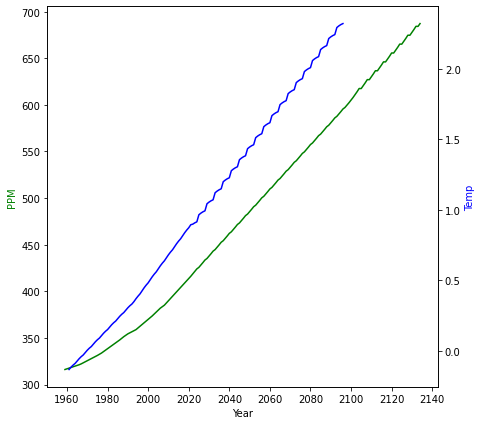

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=7,7


import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['ppm'], 'g-')
ax2.plot(df2['temp'], 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('PPM', color='g')
ax2.set_ylabel('Temp', color='b')


plt.show()

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

	
df3 = pd.read_csv(io.BytesIO(uploaded['MonthlyData.csv']))

df3.head()

Saving MonthlyData.csv to MonthlyData.csv


,Year,Month,PPM
0,1974,5,333.16
1,1974,6,332.17
2,1974,7,331.11
3,1974,8,329.11
4,1974,9,327.30


In [ ]:
df3['Year'] = pd.to_datetime(df3[['Year', 'Month']].assign(DAY=1))
df3

,Year,Month,PPM
0,1974-05-01,5,333.16
1,1974-06-01,6,332.17
2,1974-07-01,7,331.11
3,1974-08-01,8,329.11
4,1974-09-01,9,327.30
...,...,...,...
567,2021-08-01,8,414.54
568,2021-09-01,9,413.29
569,2021-10-01,10,413.91
570,2021-11-01,11,415.01


In [ ]:
df3 = df3.drop(['Month'], axis=1)

In [ ]:
df3.set_index('Year',inplace=True)
df3

,PPM
Year,
1974-05-01,333.16
1974-06-01,332.17
1974-07-01,331.11
1974-08-01,329.11
1974-09-01,327.30
...,...
2021-08-01,414.54
2021-09-01,413.29
2021-10-01,413.91


In [ ]:
df3= df3.loc['1994-03-01':'2004-03-01']

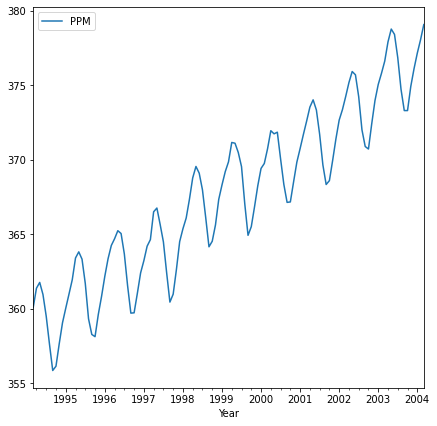

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=7,7
df3.plot()

In [ ]:
df3 = df3.sort_values(by=['PPM'])
df3

,PPM
Year,
1994-09-01,355.87
1994-10-01,356.16
1994-08-01,357.64
1994-11-01,357.67
1995-10-01,358.14
...,...
2003-04-01,377.92
2004-02-01,378.06
2003-06-01,378.42
